# **Historical Cargo Distribution in a Level 1 Area**

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedCargoesAPI/Historical%20Cargo%20Distribution%20in%20Area%20Level%20leveraging%20Geos%20API.ipynb)
**APIs Used** : Scraped Cargoes API, Geos API

---
**Description** :

In this Notebook the main goal is to find and display the Cargo Supply in a given Level 1 Area over a specific time window.

The script walks though the installation of the signal ocean SDK and import of the required dependencies used for the processing of the data.

 Also the parameters
```vessel_type_id, days_back, Area_Level_1```
are initialized, in order to be used to achieve the desired output.

Lastly, we display the chart of the data that we retrieved and present them as time series.


---



**Output** : Time-Series Graph displaying the public supply of cargoes in a Level 1 Area for a specific time frame. More on area levels [here](https://drive.google.com/file/d/1eCrnFhsjOoASQqsBJzv-rlS4vohpcV-m/view?usp=sharing).

## **Setup**


Install the Signal Ocean package

In [ ]:
%%capture
%pip install signal-ocean

Import `signal_ocean` and other modules required for this demo

In [ ]:
from signal_ocean import Connection
from signal_ocean.scraped_cargoes import ScrapedCargoesAPI, ScrapedCargo
from signal_ocean.geos import GeosAPI

from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)


## **Parameters Setup**


To get all tanker cargoes received the last X days, we must declare `vessel_type_id = 1`  and `received_date_from` variables

In [ ]:
signal_ocean_api_key = '' # Replace with your subscription key
vessel_type_id = 1  # Tanker
days_back = 20
received_date_from = datetime.utcnow() - timedelta(days=days_back)
Area_level_1 = 'US Gulf & Mainland' # Area Level 1 that we want to visualize

## **Connection**


Create a new instance of the `ScrapedCargoesAPI` and `GeosAPI` classes

In [ ]:
connection = Connection(signal_ocean_api_key)
scraped_cargoes_api = ScrapedCargoesAPI(connection)
geos_api = GeosAPI(connection)

Now we are ready to retrieve our data

## **Main CodeBlock**

### Scraped Cargoes API: Fetch Data and Deduplicate


You may also find more on our Scraped Cargoes API [here](https://signaloceansdk.github.io/SignalSDK/scraped_cargoes/), including documentation of the object methods used and more examples.



Call `get_cargoes` method, as below

In [ ]:
scraped_cargoes = scraped_cargoes_api.get_cargoes(vessel_type = vessel_type_id,received_date_from = received_date_from)

scraped_cargoes = [cargo for cargo in scraped_cargoes if not cargo.is_deleted]

For better visualization, it's convenient to insert data into a DataFrame

In [ ]:
scraped_cargoes_df = pd.DataFrame(scraped_cargoes)
scraped_cargoes_df.head()

,cargo_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,low_confidence,scraped_laycan,laycan_from,laycan_to,scraped_load,load_geo_id,load_name,load_taxonomy_id,load_taxonomy,scraped_load2,load_geo_id2,load_name2,load_taxonomy_id2,load_taxonomy2,scraped_discharge,scraped_discharge_options,discharge_geo_id,discharge_name,discharge_taxonomy_id,discharge_taxonomy,scraped_discharge2,discharge_geo_id2,discharge_name2,discharge_taxonomy_id2,discharge_taxonomy2,scraped_charterer,charterer_id,charterer,scraped_cargo_type,cargo_type_id,cargo_type,cargo_type_group_id,cargo_type_group,scraped_quantity,quantity,quantity_buffer,quantity_from,quantity_to,size_from,size_to,scraped_delivery_date,delivery_date_from,delivery_date_to,scraped_delivery_from,delivery_from_geo_id,delivery_from_name,delivery_from_taxonomy_id,delivery_from_taxonomy,scraped_delivery_to,delivery_to_geo_id,delivery_to_name,delivery_to_taxonomy_id,delivery_to_taxonomy,scraped_redelivery_from,redelivery_from_geo_id,redelivery_from_name,redelivery_from_taxonomy_id,redelivery_from_taxonomy,scraped_redelivery_to,redelivery_to_geo_id,redelivery_to_name,redelivery_to_taxonomy_id,redelivery_to_taxonomy,charter_type_id,charter_type,cargo_status_id,cargo_status,content,subject,sender,is_private
0,54777015,88353911,None,88135885,17,17,NaN,Email,2025-03-13 16:02:08+00:00,2025-03-13 16:00:20+00:00,False,False,19-20 mar,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,chennai,3517.0,Chennai,2.0,Port,None,NaN,None,NaN,None,east,None,84.0,East,7.0,Level3,None,NaN,None,NaN,None,vitol,1831.0,Vitol,nap,9.0,Naphtha,120000.0,Clean,35,35000.0,0.0,35000.0,35000.0,NaN,NaN,None,NaT,NaT,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,0,Voyage,NaN,None,vitol 19-20 mar nap 35 chennai east unsure there,harbour. | AG MR CLEAN - Evening fixture report,Harbour Marine,True
1,54777016,88353911,None,88135884,17,17,NaN,Email,2025-03-13 16:02:08+00:00,2025-03-13 16:00:20+00:00,False,False,19-20 mar,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,chennai,3517.0,Chennai,2.0,Port,None,NaN,None,NaN,None,east,None,84.0,East,7.0,Level3,None,NaN,None,NaN,None,vitol,1831.0,Vitol,nap,9.0,Naphtha,120000.0,Clean,35,35000.0,0.0,35000.0,35000.0,NaN,NaN,None,NaT,NaT,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,0,Voyage,NaN,None,vitol 19-20 mar nap 35 chennai east unsure there,harbour. | AG MR CLEAN - Evening fixture report,Harbour Marine,True
2,54777017,88353911,None,88135885,18,18,NaN,Email,2025-03-13 16:02:08+00:00,2025-03-13 16:00:20+00:00,False,False,21-23 mar,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,sikka,3530.0,Sikka,2.0,Port,None,NaN,None,NaN,None,oz,None,16.0,Australia / New Zealand,5.0,Level1,None,NaN,None,NaN,None,bp,209.0,BP,ulsd,60.0,Ultra Low Sulphur Diesel,120000.0,Clean,35,35000.0,0.0,35000.0,35000.0,NaN,NaN,None,NaT,NaT,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,0,Voyage,NaN,None,bp 21-23 mar ulsd 35 sikka oz outstanding,harbour. | AG MR CLEAN - Evening fixture report,Harbour Marine,True
3,54777018,88353911,None,88135884,18,18,NaN,Email,2025-03-13 16:02:08+00:00,2025-03-13 16:00:20+00:00,False,False,21-23 mar,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,sikka,3530.0,Sikka,2.0,Port,None,NaN,None,NaN,None,oz,None,16.0,Australia / New Zealand,5.0,Level1,None,NaN,None,NaN,None,bp,209.0,BP,ulsd,60.0,Ultra Low Sulphur Diesel,120000.0,Clean,35,35000.0,0.0,35000.0,35000.0,NaN,NaN,None,NaT,NaT,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,0,Voyage,NaN,None,bp 21-23 mar ulsd 35 sikka oz outstanding,harbour. | AG MR CLEAN - Evening fixture report,Harbour Marine,True
4,54777019,88353911,None,88135885,19,19,NaN,Email,2025-03-13 16:02:08+00:00,2025-03-13 16:00:20+00:00,False,False,23-25 mar,2025-03-23 00:00:00+00:00,2025-03-25 00:00:00+0

We perform a deduplication based on Quantity size, Delivery location, Delivery Date and Laycan Date.

Adding columns to DataFrame to condense information of interest

In [ ]:
scraped_cargoes_df["quantity_size_from"] = ""
scraped_cargoes_df["quantity_size_to"] = ""
scraped_cargoes_df["load_delivery_id"] = ""
scraped_cargoes_df["load_delivery_name"] = ""
scraped_cargoes_df["laycan_delivery_date_from"] = ""
scraped_cargoes_df["laycan_delivery_date_to"] = ""

for ind in scraped_cargoes_df.index:
    CharterType = scraped_cargoes_df.loc[ind, 'charter_type']


    if  not pd.isna(scraped_cargoes_df.loc[ind, "quantity_from"]):
       scraped_cargoes_df.loc[ind, "quantity_size_from"] = scraped_cargoes_df.loc[ind, "quantity_from"]
       scraped_cargoes_df.loc[ind, "quantity_size_to"] = scraped_cargoes_df.loc[ind, "quantity_to"]
    else:
       scraped_cargoes_df.loc[ind, "quantity_size_from"] = scraped_cargoes_df.loc[ind, "size_from"]
       scraped_cargoes_df.loc[ind, "quantity_size_to"] = scraped_cargoes_df.loc[ind, "size_to"]

    if CharterType == 'Voyage':
        scraped_cargoes_df.loc[ind, "load_delivery_id"] = scraped_cargoes_df.loc[ind, "load_geo_id"]
        scraped_cargoes_df.loc[ind, "load_delivery_name"] = scraped_cargoes_df.loc[ind, "load_name"]
        scraped_cargoes_df.loc[ind, "laycan_delivery_date_from"] = scraped_cargoes_df.loc[ind, "laycan_from"]
        scraped_cargoes_df.loc[ind, "laycan_delivery_date_to"] = scraped_cargoes_df.loc[ind, "laycan_to"]
    else:
        scraped_cargoes_df.loc[ind, "load_delivery_id"] = scraped_cargoes_df.loc[ind, "delivery_from_geo_id"]
        scraped_cargoes_df.loc[ind, "load_delivery_name"] = scraped_cargoes_df.loc[ind, "delivery_from_name"]
        scraped_cargoes_df.loc[ind, "laycan_delivery_date_from"] = scraped_cargoes_df.loc[ind, "delivery_date_from"]
        scraped_cargoes_df.loc[ind, "laycan_delivery_date_to"] = scraped_cargoes_df.loc[ind, "delivery_date_to"]
scraped_cargoes_df["parent_cargo"] = 0

scraped_cargoes_df.head()

,cargo_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,low_confidence,scraped_laycan,laycan_from,laycan_to,scraped_load,load_geo_id,load_name,load_taxonomy_id,load_taxonomy,scraped_load2,load_geo_id2,load_name2,load_taxonomy_id2,load_taxonomy2,scraped_discharge,scraped_discharge_options,discharge_geo_id,discharge_name,discharge_taxonomy_id,discharge_taxonomy,scraped_discharge2,discharge_geo_id2,discharge_name2,discharge_taxonomy_id2,discharge_taxonomy2,scraped_charterer,charterer_id,charterer,scraped_cargo_type,cargo_type_id,cargo_type,cargo_type_group_id,cargo_type_group,scraped_quantity,quantity,quantity_buffer,quantity_from,quantity_to,size_from,size_to,scraped_delivery_date,delivery_date_from,delivery_date_to,scraped_delivery_from,delivery_from_geo_id,delivery_from_name,delivery_from_taxonomy_id,delivery_from_taxonomy,scraped_delivery_to,delivery_to_geo_id,delivery_to_name,delivery_to_taxonomy_id,delivery_to_taxonomy,scraped_redelivery_from,redelivery_from_geo_id,redelivery_from_name,redelivery_from_taxonomy_id,redelivery_from_taxonomy,scraped_redelivery_to,redelivery_to_geo_id,redelivery_to_name,redelivery_to_taxonomy_id,redelivery_to_taxonomy,charter_type_id,charter_type,cargo_status_id,cargo_status,content,subject,sender,is_private,quantity_size_from,quantity_size_to,load_delivery_id,load_delivery_name,laycan_delivery_date_from,laycan_delivery_date_to,parent_cargo
0,54777015,88353911,None,88135885,17,17,NaN,Email,2025-03-13 16:02:08+00:00,2025-03-13 16:00:20+00:00,False,False,19-20 mar,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,chennai,3517.0,Chennai,2.0,Port,None,NaN,None,NaN,None,east,None,84.0,East,7.0,Level3,None,NaN,None,NaN,None,vitol,1831.0,Vitol,nap,9.0,Naphtha,120000.0,Clean,35,35000.0,0.0,35000.0,35000.0,NaN,NaN,None,NaT,NaT,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,0,Voyage,NaN,None,vitol 19-20 mar nap 35 chennai east unsure there,harbour. | AG MR CLEAN - Evening fixture report,Harbour Marine,True,35000.0,35000.0,3517.0,Chennai,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,0
1,54777016,88353911,None,88135884,17,17,NaN,Email,2025-03-13 16:02:08+00:00,2025-03-13 16:00:20+00:00,False,False,19-20 mar,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,chennai,3517.0,Chennai,2.0,Port,None,NaN,None,NaN,None,east,None,84.0,East,7.0,Level3,None,NaN,None,NaN,None,vitol,1831.0,Vitol,nap,9.0,Naphtha,120000.0,Clean,35,35000.0,0.0,35000.0,35000.0,NaN,NaN,None,NaT,NaT,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,0,Voyage,NaN,None,vitol 19-20 mar nap 35 chennai east unsure there,harbour. | AG MR CLEAN - Evening fixture report,Harbour Marine,True,35000.0,35000.0,3517.0,Chennai,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,0
2,54777017,88353911,None,88135885,18,18,NaN,Email,2025-03-13 16:02:08+00:00,2025-03-13 16:00:20+00:00,False,False,21-23 mar,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,sikka,3530.0,Sikka,2.0,Port,None,NaN,None,NaN,None,oz,None,16.0,Australia / New Zealand,5.0,Level1,None,NaN,None,NaN,None,bp,209.0,BP,ulsd,60.0,Ultra Low Sulphur Diesel,120000.0,Clean,35,35000.0,0.0,35000.0,35000.0,NaN,NaN,None,NaT,NaT,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,NaN,None,0,Voyage,NaN,None,bp 21-23 mar ulsd 35 sikka oz outstanding,harbour. | AG MR CLEAN - Evening fixture report,Harbour Marine,True,35000.0,35000.0,3530.0,Sikka,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,0
3,54777018,88353911,None,88135884,18,18,NaN,Email,2025-03-13 16:02:08+00:00,2025-03-13 16:00:20+00:00,False,False,21-23 mar,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,sikka,3530.0,Sikka,2.0,Port,None,NaN,None,NaN,None,oz,None,16.0,Australia / New Zealand,5.0,Level1,None,NaN,None,NaN,None,bp,209.0,BP,ulsd,60.0,Ultra Low Sulphur Diesel,120000.0,Clean,35,35000.0,0.0,35000.0,35000.0,NaN,NaN,None,NaT,NaT,Non

Drop Columns from DataFrame that are not needed

In [ ]:
scraped_cargoes_df = scraped_cargoes_df[['received_date','charterer','quantity_size_from','quantity_size_to','load_delivery_name','load_taxonomy','load_delivery_id','laycan_delivery_date_from','laycan_delivery_date_to','charter_type','parent_cargo']]
scraped_cargoes_df.loc[:, 'received_date'] = scraped_cargoes_df['received_date'].dt.normalize()
scraped_cargoes_df.head(5)

,received_date,charterer,quantity_size_from,quantity_size_to,load_delivery_name,load_taxonomy,load_delivery_id,laycan_delivery_date_from,laycan_delivery_date_to,charter_type,parent_cargo
0,2025-03-13 00:00:00+00:00,Vitol,35000.0,35000.0,Chennai,Port,3517.0,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,Voyage,0
1,2025-03-13 00:00:00+00:00,Vitol,35000.0,35000.0,Chennai,Port,3517.0,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,Voyage,0
2,2025-03-13 00:00:00+00:00,BP,35000.0,35000.0,Sikka,Port,3530.0,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,Voyage,0
3,2025-03-13 00:00:00+00:00,BP,35000.0,35000.0,Sikka,Port,3530.0,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,Voyage,0
4,2025-03-13 00:00:00+00:00,Trafigura,35000.0,35000.0,None,Unknown,-1.0,2025-03-23 00:00:00+00:00,2025-03-25 00:00:00+00:00,Voyage,0


Cargo count before deduplication

In [ ]:
print ("Count of cargoes before deduplications:" ,len(scraped_cargoes_df.index))

Count of cargoes before deduplications: 10467


In [ ]:
scraped_cargoes_df.set_index('received_date').head(10)

,charterer,quantity_size_from,quantity_size_to,load_delivery_name,load_taxonomy,load_delivery_id,laycan_delivery_date_from,laycan_delivery_date_to,charter_type,parent_cargo
received_date,,,,,,,,,,
2025-03-13 00:00:00+00:00,Vitol,35000.0,35000.0,Chennai,Port,3517.0,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,Voyage,0
2025-03-13 00:00:00+00:00,Vitol,35000.0,35000.0,Chennai,Port,3517.0,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,Voyage,0
2025-03-13 00:00:00+00:00,BP,35000.0,35000.0,Sikka,Port,3530.0,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,Voyage,0
2025-03-13 00:00:00+00:00,BP,35000.0,35000.0,Sikka,Port,3530.0,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,Voyage,0
2025-03-13 00:00:00+00:00,Trafigura,35000.0,35000.0,None,Unknown,-1.0,2025-03-23 00:00:00+00:00,2025-03-25 00:00:00+00:00,Voyage,0
2025-03-13 00:00:00+00:00,Trafigura,35000.0,35000.0,None,Unknown,-1.0,2025-03-23 00:00:00+00:00,2025-03-25 00:00:00+00:00,Voyage,0
2025-03-13 00:00:00+00:00,Aramco Trading Singapore,35000.0,35000.0,Arabian Gulf,Level0,24777.0,2025-03-28 00:00:00+00:00,2025-03-29 00:00:00+00:00,Voyage,0
2025-03-13 00:00:00+00:00,Aramco Trading Singapore,35000.0,35000.0,Arabian Gulf,Level0,24777.0,2025-03-28 00:00:00+00:00,2025-03-29 00:00:00+00:00,Voyage,0
2025-03-13 00:00:00+00:00,Emirates National Oil,35000.0,35000.0,Umm Qasr,Port,7117.0,2025-03-28 00:00:00+00:00,2025-03-30 00:00:00+00:00,Voyage,0


Drop Duplicated Cargo Records

In [ ]:
scraped_cargoes_df_deduplicated=scraped_cargoes_df.drop_duplicates()
scraped_cargoes_df_deduplicated.head(10)

,received_date,charterer,quantity_size_from,quantity_size_to,load_delivery_name,load_taxonomy,load_delivery_id,laycan_delivery_date_from,laycan_delivery_date_to,charter_type,parent_cargo
0,2025-03-13 00:00:00+00:00,Vitol,35000.0,35000.0,Chennai,Port,3517.0,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,Voyage,0
2,2025-03-13 00:00:00+00:00,BP,35000.0,35000.0,Sikka,Port,3530.0,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,Voyage,0
4,2025-03-13 00:00:00+00:00,Trafigura,35000.0,35000.0,None,Unknown,-1.0,2025-03-23 00:00:00+00:00,2025-03-25 00:00:00+00:00,Voyage,0
6,2025-03-13 00:00:00+00:00,Aramco Trading Singapore,35000.0,35000.0,Arabian Gulf,Level0,24777.0,2025-03-28 00:00:00+00:00,2025-03-29 00:00:00+00:00,Voyage,0
8,2025-03-13 00:00:00+00:00,Emirates National Oil,35000.0,35000.0,Umm Qasr,Port,7117.0,2025-03-28 00:00:00+00:00,2025-03-30 00:00:00+00:00,Voyage,0
10,2025-03-13 00:00:00+00:00,Total,35000.0,35000.0,Jebel Ali,Port,3157.0,2025-03-19 00:00:00+00:00,2025-03-19 00:00:00+00:00,Voyage,0
12,2025-03-13 00:00:00+00:00,Trafigura,35000.0,35000.0,None,Unknown,-1.0,2025-03-11 00:00:00+00:00,2025-03-12 00:00:00+00:00,Voyage,0
14,2025-03-13 00:00:00+00:00,Bayegan,30000.0,30000.0,None,Unknown,-1.0,2025-03-15 00:00:00+00:00,2025-03-16 00:00:00+00:00,Voyage,0
15,2025-03-13 00:00:00+00:00,Mercuria,30000.0,37000.0,Fawley,Port,3426.0,2025-03-16 00:00:00+00:00,2025-03-18 00:00:00+00:00,Voyage,0
17,2025-03-13 00:00:00+00:00,Trafigura,30000.0,37000.0,Terneuzen,Port,3691.0,NaT,NaT,Voyage,0


Count of cargoes after deduplication

In [ ]:
print ("Count of cargoes after deduplications:" ,len(scraped_cargoes_df_deduplicated.index))

Count of cargoes after deduplications: 4108


Calculation of cargoes recieved per day globally

In [ ]:
date_counts = scraped_cargoes_df_deduplicated.groupby('received_date').size().reset_index(name='count')
date_counts

,received_date,count
0,2025-03-13 00:00:00+00:00,48
1,2025-03-14 00:00:00+00:00,218
2,2025-03-15 00:00:00+00:00,54
3,2025-03-17 00:00:00+00:00,338
4,2025-03-18 00:00:00+00:00,339
5,2025-03-19 00:00:00+00:00,362
6,2025-03-20 00:00:00+00:00,345
7,2025-03-21 00:00:00+00:00,338
8,2025-03-24 00:00:00+00:00,244
9,2025-03-25 00:00:00+00:00,271


In [ ]:
distinct_taxonomies = scraped_cargoes_df['load_taxonomy'].unique()
distinct_taxonomies

array(['Port', 'Unknown', 'Level0', 'GeoAsset', 'Country', None, 'Level1',
       'Level2'], dtype=object)

### Geos API: Retrieve All ports with AreaLevel0,AreaLevel1,AreaLevel2 Names

Scraped cargoes come with different location names, ranging from Port to Area Level 2.

In order to make our analysis, we have to normalize the Area Level to all cargoes retrieved. Thus, we use the Geos API to have a look-up table of the ports and their correspondent areas.

You may also find more on our Geos API [here](https://signaloceansdk.github.io/SignalSDK/geos/), including documentation of the object methods used and more examples.


In [ ]:
all_areas = geos_api.get_areas()
df_areas = pd.DataFrame([a.__dict__ for a in all_areas])

In [ ]:
all_ports = geos_api.get_ports()
df_ports = pd.DataFrame([a.__dict__ for a in all_ports])

In [ ]:
all_countries= geos_api.get_ports()
df_countries = pd.DataFrame([a.__dict__ for a in all_countries])

In [ ]:
all_geoAssets = geos_api.get_geoAssets()
df_geoAssets = pd.DataFrame([a.__dict__ for a in all_geoAssets])

In [ ]:
df_areas_all = df_areas[df_areas['location_taxonomy_id'] == 7].merge(df_areas,how = 'left',left_on = 'area_id',right_on = 'parent_area_id',suffixes = ['_level3','_level2'])[['area_id_level3','area_name_level3','area_id_level2','area_name_level2']]\
                                                              .merge(df_areas,how = 'left',left_on = 'area_id_level2',right_on = 'parent_area_id')[['area_id_level3','area_name_level3','area_id_level2','area_name_level2','area_id','area_name']]\
                                                              .merge(df_areas,how = 'left',left_on = 'area_id',right_on = 'parent_area_id',suffixes = ['_level1','_level0'])[['area_id_level3','area_name_level3','area_id_level2','area_name_level2','area_id_level1','area_name_level1','area_id_level0','area_name_level0']]\


# DataFrame with Area3,Area2,Area1,Area0 of ports
df_areas_ports_all = df_areas_all.merge(df_ports,how = 'right',left_on = ['area_id_level2','area_id_level1','area_id_level0'], right_on = ['area_id_level2','area_id_level1','area_id_level0'],suffixes = ['_prev', '_port'])
df_areas_ports_all = df_areas_ports_all[['area_id_level2','area_name_level2_prev','area_id_level1','area_name_level1_prev','area_id_level0', 'area_name_level0_prev','port_id','port_name']]
df_areas_ports_all = df_areas_ports_all.loc[df_areas_ports_all['area_id_level1'] > 0].loc[df_areas_ports_all['port_id'] > 0]



In [ ]:
# DataFrame with country, Areas level 1 of countries
df_country_arealevel1 = df_countries.merge(df_ports,how = 'left',left_on = 'country_id',right_on = 'country_id',suffixes = ['_country',None])[['port_id','port_name','country_id','country_name_country','area_id_level1']]\
                                                  .merge(df_areas.loc[df_areas['location_taxonomy_id'] == 5],how = 'left',left_on = 'area_id_level1',right_on = 'area_id',suffixes = (None, '_area'))[['country_id','country_name_country','area_id', 'area_name']]

df_country_areaslevel1 = df_country_arealevel1.copy()
df_country_areaslevel1 = df_country_areaslevel1[['country_id','country_name_country']].drop_duplicates()
df_country_areaslevel1['Areas_Level_1_In_Country'] = None
df_country_areaslevel1 = df_country_areaslevel1.reset_index(drop=True)
for idx, country in df_country_areaslevel1.iterrows():
  country_name = country['country_name_country']
  df_country_areaslevel1.at[idx,'Areas_Level_1_In_Country'] = df_country_arealevel1.loc[df_country_arealevel1['country_name_country'] == country_name ]['area_name'].unique()
df_country_areaslevel1

,country_id,country_name_country,Areas_Level_1_In_Country
0,-105,Russia,Black Sea / Sea Of Marmara
1,-104,Korea,Korea / Japan
2,-103,Arabian Gulf,Arabian Gulf
3,-102,Caribs,Caribs
4,-101,East Mediterranean,Mediterranean
...,...,...,...
192,234,Tuvalu,Pacific Islands
193,33,Saint Barthelemy,Caribs
194,146,"Moldova, Republic of",Black Sea / Sea Of Marmara
195,61,Christmas Island,South East Asia


### Normalize cargo locations to Area Level 1

In [ ]:
scraped_cargoes_df_deduplicated = scraped_cargoes_df_deduplicated.copy()
scraped_cargoes_df_deduplicated['level1_area_load_delivery'] = None
scraped_cargoes_df_deduplicated.head(5)

,received_date,charterer,quantity_size_from,quantity_size_to,load_delivery_name,load_taxonomy,load_delivery_id,laycan_delivery_date_from,laycan_delivery_date_to,charter_type,parent_cargo,level1_area_load_delivery
0,2025-03-13 00:00:00+00:00,Vitol,35000.0,35000.0,Chennai,Port,3517.0,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,Voyage,0,None
2,2025-03-13 00:00:00+00:00,BP,35000.0,35000.0,Sikka,Port,3530.0,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,Voyage,0,None
4,2025-03-13 00:00:00+00:00,Trafigura,35000.0,35000.0,None,Unknown,-1.0,2025-03-23 00:00:00+00:00,2025-03-25 00:00:00+00:00,Voyage,0,None
6,2025-03-13 00:00:00+00:00,Aramco Trading Singapore,35000.0,35000.0,Arabian Gulf,Level0,24777.0,2025-03-28 00:00:00+00:00,2025-03-29 00:00:00+00:00,Voyage,0,None
8,2025-03-13 00:00:00+00:00,Emirates National Oil,35000.0,35000.0,Umm Qasr,Port,7117.0,2025-03-28 00:00:00+00:00,2025-03-30 00:00:00+00:00,Voyage,0,None


In the below codeblock, we match cargoes that have a Level0 location to its correspondent Level 1 Area.

In [ ]:
load_taxonomy_valid = ['GeoAsset', 'Port', 'Level0', 'Country', 'Level1']
load_taxonomy_invalid = ['Unknown','Level2']

for idx, row in scraped_cargoes_df_deduplicated.iterrows():
  taxonomy = row['load_taxonomy']

  if taxonomy in load_taxonomy_invalid:
    scraped_cargoes_df_deduplicated.at[idx,'level1_area_load_delivery'] = "N/A"

  #Load Taxonomy = AreaLevel1
  if taxonomy == 'Level1':
    area_name = row['load_delivery_name']
    scraped_cargoes_df_deduplicated.at[idx,'level1_area_load_delivery'] = area_name
  #Load Taxonomy = AreaLevel0
  if taxonomy == 'Level0':
    area_level_0_id = row['load_delivery_id']
    scraped_cargoes_df_deduplicated.at[idx,'level1_area_load_delivery']=df_areas_all.loc[df_areas_all['area_id_level0'] == area_level_0_id]['area_name_level1'].values[0]
  #Load Taxonomy = Country
  if taxonomy == 'Country':
    country_id= row['load_delivery_id']
    scraped_cargoes_df_deduplicated.at[idx,'level1_area_load_delivery']=df_country_areaslevel1.loc[df_country_areaslevel1['country_id'] == country_id]['Areas_Level_1_In_Country'].values
  #Load Taxonomy = Port
  if taxonomy == 'Port':
    port_id = row['load_delivery_id']
    scraped_cargoes_df_deduplicated.at[idx,'level1_area_load_delivery']= df_areas_ports_all.loc[df_areas_ports_all['port_id'] == port_id]['area_name_level1_prev'].values[0]
  #Load Taxonomy = GeoAsset
  if taxonomy == 'GeoAsset':
    geoasset_id = row['load_delivery_id']
    scraped_cargoes_df_deduplicated.at[idx,'level1_area_load_delivery']= df_geoAssets.loc[df_geoAssets['geo_asset_id'] == geoasset_id]['area_name_level1'].values

scraped_cargoes_df_deduplicated.reset_index(drop = True)

,received_date,charterer,quantity_size_from,quantity_size_to,load_delivery_name,load_taxonomy,load_delivery_id,laycan_delivery_date_from,laycan_delivery_date_to,charter_type,parent_cargo,level1_area_load_delivery
0,2025-03-13 00:00:00+00:00,Vitol,35000.0,35000.0,Chennai,Port,3517.0,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,Voyage,0,India / Pakistan
1,2025-03-13 00:00:00+00:00,BP,35000.0,35000.0,Sikka,Port,3530.0,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,Voyage,0,India / Pakistan
2,2025-03-13 00:00:00+00:00,Trafigura,35000.0,35000.0,None,Unknown,-1.0,2025-03-23 00:00:00+00:00,2025-03-25 00:00:00+00:00,Voyage,0,N/A
3,2025-03-13 00:00:00+00:00,Aramco Trading Singapore,35000.0,35000.0,Arabian Gulf,Level0,24777.0,2025-03-28 00:00:00+00:00,2025-03-29 00:00:00+00:00,Voyage,0,Arabian Gulf
4,2025-03-13 00:00:00+00:00,Emirates National Oil,35000.0,35000.0,Umm Qasr,Port,7117.0,2025-03-28 00:00:00+00:00,2025-03-30 00:00:00+00:00,Voyage,0,Arabian Gulf
...,...,...,...,...,...,...,...,...,...,...,...,...
4103,2025-04-02 00:00:00+00:00,None,30000.0,30000.0,Mersin,Port,3816.0,2025-04-03 00:00:00+00:00,2025-04-05 00:00:00+00:00,Voyage,0,Mediterranean
4104,2025-04-02 00:00:00+00:00,Trafigura,37000.0,37000.0,Augusta,Port,3547.0,2025-04-05 00:00:00+00:00,2025-04-10 00:00:00+00:00,Voyage,0,Mediterranean
4105,2025-04-02 00:00:00+00:00,None,30000.0,30000.0,Sidi Kerir,Port,3375.0,2025-04-07 00:00:00+00:00,2025-04-09 00:00:00+00:00,Voyage,0,Mediterranean
4106,2025-04-02 00:00:00+00:00,ST Shipping & Transport,80000.0,80000.0,Hound Point,Port,3444.0,2025-04-08 00:00:00+00:00,2025-04-08 00:00:00+00:00,Voyage,0,UK Continent


### Prepare final table and Graph



Find the Cargoes that correspond to the specific Level 1 Area

In [ ]:
timeseries_table = scraped_cargoes_df_deduplicated.copy()
matching_rows = timeseries_table['level1_area_load_delivery'].apply(
    lambda x: Area_level_1 == x if isinstance(x, str) else Area_level_1 in x if isinstance(x, list) else False) # Some countries belong to multiple level 1 areas.
timeseries_table['matching_rows'] = matching_rows
timeseries_table.head(5)

,received_date,charterer,quantity_size_from,quantity_size_to,load_delivery_name,load_taxonomy,load_delivery_id,laycan_delivery_date_from,laycan_delivery_date_to,charter_type,parent_cargo,level1_area_load_delivery,matching_rows
0,2025-03-13 00:00:00+00:00,Vitol,35000.0,35000.0,Chennai,Port,3517.0,2025-03-19 00:00:00+00:00,2025-03-20 00:00:00+00:00,Voyage,0,India / Pakistan,False
2,2025-03-13 00:00:00+00:00,BP,35000.0,35000.0,Sikka,Port,3530.0,2025-03-21 00:00:00+00:00,2025-03-23 00:00:00+00:00,Voyage,0,India / Pakistan,False
4,2025-03-13 00:00:00+00:00,Trafigura,35000.0,35000.0,None,Unknown,-1.0,2025-03-23 00:00:00+00:00,2025-03-25 00:00:00+00:00,Voyage,0,N/A,False
6,2025-03-13 00:00:00+00:00,Aramco Trading Singapore,35000.0,35000.0,Arabian Gulf,Level0,24777.0,2025-03-28 00:00:00+00:00,2025-03-29 00:00:00+00:00,Voyage,0,Arabian Gulf,False
8,2025-03-13 00:00:00+00:00,Emirates National Oil,35000.0,35000.0,Umm Qasr,Port,7117.0,2025-03-28 00:00:00+00:00,2025-03-30 00:00:00+00:00,Voyage,0,Arabian Gulf,False


Daily Calculation of public cargoes

In [ ]:
date_counts = timeseries_table.loc[timeseries_table['matching_rows'] == True].groupby('received_date').size().reset_index(name='count') # Make the cargoes received per day globally
date_counts # We count the cargoes that were public for every day in our timeframe

,received_date,count
0,2025-03-13 00:00:00+00:00,5
1,2025-03-14 00:00:00+00:00,8
2,2025-03-15 00:00:00+00:00,2
3,2025-03-17 00:00:00+00:00,29
4,2025-03-18 00:00:00+00:00,39
5,2025-03-19 00:00:00+00:00,44
6,2025-03-20 00:00:00+00:00,46
7,2025-03-21 00:00:00+00:00,44
8,2025-03-24 00:00:00+00:00,33
9,2025-03-25 00:00:00+00:00,47


## **Output**

Chart Creation, addiing chart details

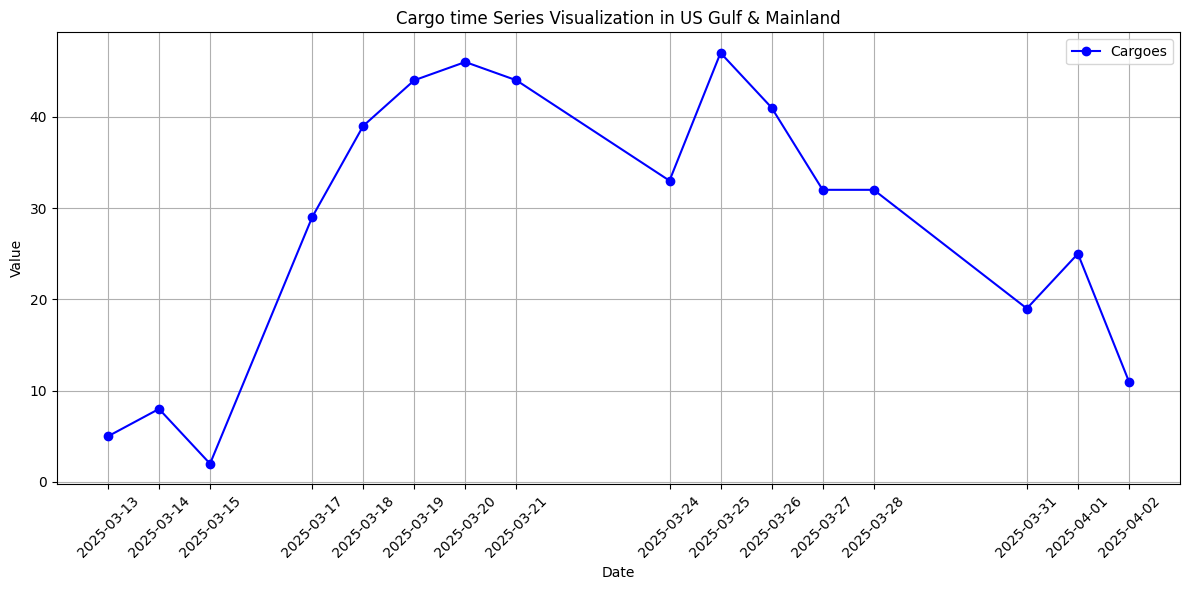

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(date_counts["received_date"], date_counts["count"], marker="o", linestyle="-", color="b", label="Cargoes")
plt.title("Cargo time Series Visualization in " + Area_level_1 )
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.xticks(date_counts["received_date"], rotation=45)


plt.tight_layout()
plt.show()